# Classification
## Proof of Concept

First import needed modules and load the dataset in complete

In [2]:
# Imports for the notebook
# General imports
import pandas as pd
import numpy as np

# Visualization frameworks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

# Importing selfbuild modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import modules.DataLoader as DataLoader

covid19 = DataLoader.load_covid19()

covid19.head(5)

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
ObjectId,,,,,,,,,,,,,,,,,
45167592,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,2020-10-19,0,-9,2020-09-30,0,1,0,Nicht übermittelt
45167593,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,2020-10-19,0,-9,2020-08-24,0,1,0,Nicht übermittelt
45167594,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-26,0,1,0,Nicht übermittelt
45167595,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt
45167596,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt


In [6]:
covid19[(covid19.AnzahlFall > 1) & ((covid19.NeuerTodesfall != -9))].count()

IdBundesland            474
Bundesland              474
Landkreis               474
Altersgruppe            474
Geschlecht              474
AnzahlFall              474
AnzahlTodesfall         474
Meldedatum              474
IdLandkreis             474
Datenstand              474
NeuerFall               474
NeuerTodesfall          474
Refdatum                474
NeuGenesen              474
AnzahlGenesen           474
IstErkrankungsbeginn    474
Altersgruppe2           474
dtype: int64

# First classification of Death or not:

1.  Create the class feature and join to the dataframe. 
2.  Select the features "Altersgruppe", "Geschlecht", "Bundesland" and "Landkreis".
3.  Make "Altersgruppe" a ordinal class.
4.  Build a classification model.

In [8]:
# Load the death_case_test and features
covid19_death_test, feats = DataLoader.load_covid19_for_deathcase()

print(feats)
covid19.head(5)

['Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 'Meldedatum', 'Deathcase']


,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
ObjectId,,,,,,,,,,,,,,,,,
45167592,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,2020-10-19,0,-9,2020-09-30,0,1,0,Nicht übermittelt
45167593,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,2020-10-19,0,-9,2020-08-24,0,1,0,Nicht übermittelt
45167594,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-26,0,1,0,Nicht übermittelt
45167595,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt
45167596,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt


In [10]:
print("Current count of NaN values:")
covid19_death_test.isna().sum()

Current count of NaN values:


Bundesland         0
Landkreis          0
Altersgruppe     371
Geschlecht      1010
Meldedatum         0
Deathcase          0
dtype: int64

In [12]:
# Lets look in which class the nan values appear:
covid19_death_test[covid19_death_test["Deathcase"] == True].isna().sum()

Bundesland      0
Landkreis       0
Altersgruppe    0
Geschlecht      4
Meldedatum      0
Deathcase       0
dtype: int64

In [14]:
# Only four of the Deathcases got unkown values, so we can drop them from the dataset
covid19_death_test = covid19_death_test.dropna()

print("Cleaned count of NaN values")
covid19_death_test.isna().sum()

Cleaned count of NaN values


Bundesland      0
Landkreis       0
Altersgruppe    0
Geschlecht      0
Meldedatum      0
Deathcase       0
dtype: int64

Accuracy: 0.96 (+/- 0.00)
Precision: 0.49
Recall: 0.03
F1.Score: 0.06
              precision    recall  f1-score   support

No Deathcase       0.96      1.00      0.98     45056
   Deathcase       0.49      0.03      0.06      1771

    accuracy                           0.96     46827
   macro avg       0.73      0.52      0.52     46827
weighted avg       0.95      0.96      0.95     46827



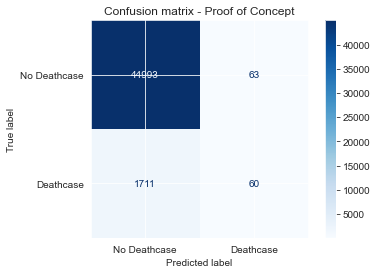

In [49]:
# Build the model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    covid19_death_test[feats[:-2]], 
    covid19_death_test[feats[-1]],
    test_size=0.2,
    random_state=42)

num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, ["Altersgruppe"]),
    ("cat", cat_transfomer, ["Bundesland", "Landkreis", "Geschlecht"])
])

model = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression())
])

scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=12)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Precision: %0.2f" % (precision_score(y_test, y_pred, average='binary')))
print("Recall: %0.2f" % (recall_score(y_test, y_pred)))
print("F1.Score: %0.2f" % (f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=["No Deathcase", "Deathcase"]))
plot_confusion_matrix(model, X_test, y_test, display_labels=["No Deathcase", "Deathcase"], cmap=plt.cm.Blues)
plt.title("Confusion matrix - Proof of Concept")
plt.show()